We repeat the procedure in other notebook to import dataset: 

In [1]:
import itertools
import random
from pprint import pprint

# Define the paths to the dataset files
english_dataset_path = r'./dataset/News-Commentary/News-Commentary.en-zh.en'
chinese_dataset_path = r'./dataset/News-Commentary/News-Commentary.en-zh.zh'

# Function to get random sentence pairs
def get_random_sentence_pairs(english_path, chinese_path, num_pairs=1):
    with open(english_path, 'r', encoding='utf-8') as eng_file, \
         open(chinese_path, 'r', encoding='utf-8') as zh_file:
        
        # Read all lines from both files
        english_lines = eng_file.readlines()
        chinese_lines = zh_file.readlines()
        
        # Ensure both files have the same number of lines
        if len(english_lines) != len(chinese_lines):
            print("Error: The files don't have the same number of lines.")
            return None

        # Generate random indices
        random_indices = random.sample(range(len(english_lines)), num_pairs)
        
        # Get the random sentence pairs
        sentence_pairs = [(english_lines[index].strip(), chinese_lines[index].strip()) for index in random_indices]
        
        return sentence_pairs

# Example usage:
# Generate 5 random sentence pairs
num_of_gen = 5

sentence_pair = get_random_sentence_pairs(english_dataset_path, chinese_dataset_path, num_of_gen)
pprint(sentence_pair)

for eng, zh in sentence_pair:
    pass# Add an empty line between pairs for readability

[('Its population is exploding, as are its economic-growth rates. Senegalese '
  'firms seek to help their Spanish business partners, while Portugal extends '
  'an almost royal welcome to the leaders of their former colony, newly '
  'oil-rich Angola.',
  '但是这种比喻也有局限性。 尽管非洲存在许多问题，非洲目前已经成为��一个充满希望的大陆。 其人口正在急速膨胀，经济增长率也正在爆炸式增长。 '
  '塞内加尔的公司在寻求方法帮助其西班牙商业合作伙伴。 同时，葡萄牙为石油资源丰富的安哥拉 - - '
  '-曾经是葡萄牙的殖民地的领导人举办了近乎皇室待遇的欢迎仪式。'),
 ('MADRID ‒ The successful outcome of the negotiations on Iran’s nuclear '
  'program provides a splendid validation for those who put their faith in '
  'diplomacy. The agreement – concluded after more than a decade of talks – '
  'highlights the value of persistence in addressing impasses that seem '
  'insurmountable, and provides hope for the many other initiatives that will '
  'be needed to bring lasting peace to the Middle East.',
  '马德里—伊朗核计划谈判的成功结果给了相信外交的人一个强有力的明证。 伊核协议 — — 在经历了十年多的谈判后终于完成 — — '
  '凸显出在解决看似无法克服的僵局时坚持的重要性，并给维持中东和平所需要的其他许多计划带来了希望。'),
 ('The Surrender

## Step 2: Translation detection 

### Test 1 - BLEU

In [10]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import jieba


for eng, zh in sentence_pair:
    # Tokenize the English sentence into words
    eng_tokens = eng.split()
    
    # Tokenize the Chinese sentence into words using jieba
    zh_tokens = list(jieba.cut(zh))

    # Calculate BLEU score using a smoothing function for sentences with no 4-gram overlaps
    score = sentence_bleu([eng_tokens], zh_tokens, smoothing_function=SmoothingFunction().method1)
    
    print(f"English: {eng_tokens}")
    print(f"Chinese: {zh_tokens}")
    print(f"BLEU score: {score}\n")

English: ['Its', 'population', 'is', 'exploding,', 'as', 'are', 'its', 'economic-growth', 'rates.', 'Senegalese', 'firms', 'seek', 'to', 'help', 'their', 'Spanish', 'business', 'partners,', 'while', 'Portugal', 'extends', 'an', 'almost', 'royal', 'welcome', 'to', 'the', 'leaders', 'of', 'their', 'former', 'colony,', 'newly', 'oil-rich', 'Angola.']
Chinese: ['但是', '这种', '比喻', '也', '有', '局限性', '。', ' ', '尽管', '非洲', '存在', '许多', '问题', '，', '非洲', '目前', '已经', '成为', '�', '�', '一个', '充满希望', '的', '大陆', '。', ' ', '其', '人口', '正在', '急速', '膨胀', '，', '经济', '增长率', '也', '正在', '爆炸式', '增长', '。', ' ', '塞内加尔', '的', '公司', '在', '寻求', '方法', '帮助', '其', '西班牙', '商业', '合作伙伴', '。', ' ', '同时', '，', '葡萄牙', '为', '石油资源', '丰富', '的', '安哥拉', ' ', '-', ' ', '-', ' ', '-', '曾经', '是', '葡萄牙', '的', '殖民地', '的', '领导人', '举办', '了', '近乎', '皇室', '待遇', '的', '欢迎仪式', '。']
BLEU score: 0

English: ['MADRID', '‒', 'The', 'successful', 'outcome', 'of', 'the', 'negotiations', 'on', 'Iran’s', 'nuclear', 'program', 'provides', 'a', 'splendi

This BLEU requires us to obtain multiple translations by human-generated reference, and are meant to represent the diversity of possible correct translation. 

Explanation of why BLEU return score = 0:

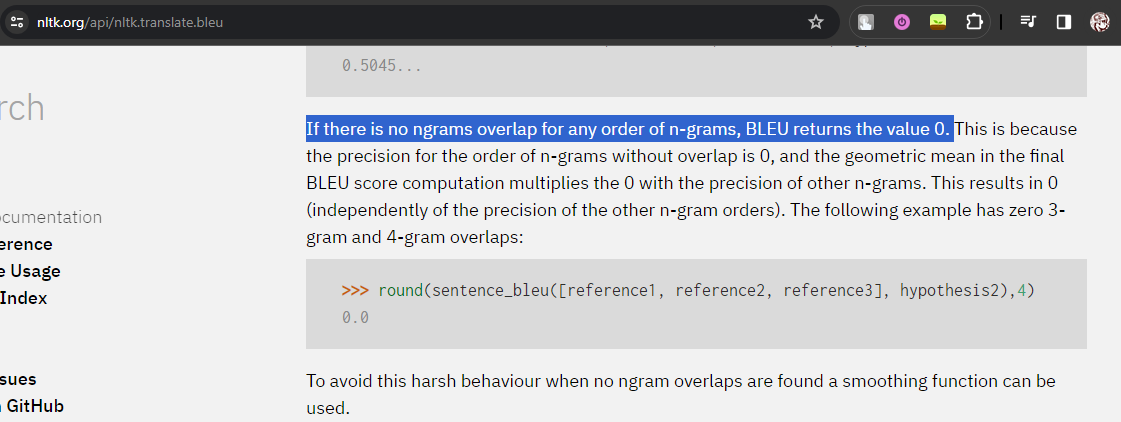

### Test 2: Language models

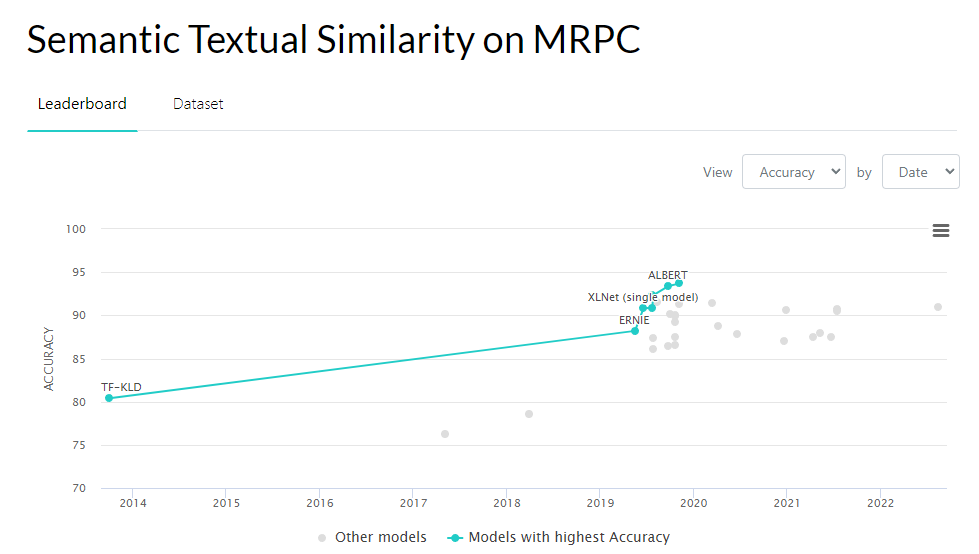
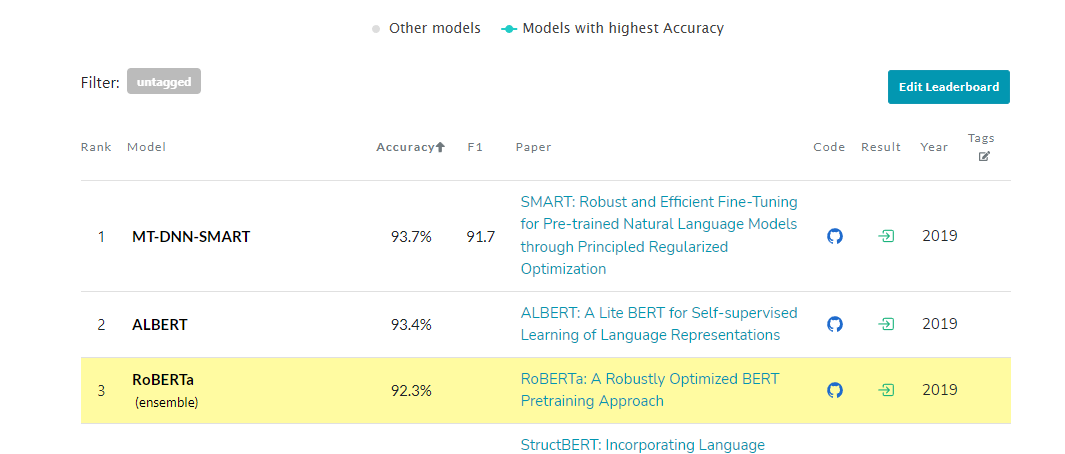

Best models:
- ALBERT (from google research) (93.4%) (A Lite BERT for Self-supervised Learning of Language Representations) (Focusing on reducing memory consumption)
- RoBERTa (from facebook research) (A Robustly Optimized BERT Pretraining Approach)

Meta provide a bigger ecosystem that support development so I choose RoBERTa.

In [3]:
from transformers import RobertaModel, RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
def encode_sentences(tokenizer, sentence_en, sentence_cn):
    tokens_en = tokenizer(sentence_en, return_tensors='pt', padding=True, truncation=True)
    tokens_cn = tokenizer(sentence_cn, return_tensors='pt', padding=True, truncation=True)
    return tokens_en, tokens_cn

In [5]:
def get_embeddings(model, tokens):
    with torch.no_grad():
        outputs = model(**tokens)
        # Take the embeddings of the [CLS] token for sentence representation
        embeddings = outputs.last_hidden_state[:, 0, :]
    return embeddings

In [6]:
from torch.nn.functional import cosine_similarity

def calculate_similarity(embedding1, embedding2):
    return cosine_similarity(embedding1, embedding2)

In [7]:
import torch
for sentence_en, sentence_cn in sentence_pair:
    tokens_en, tokens_cn = encode_sentences(tokenizer, sentence_en, sentence_cn)
    embedding_en = get_embeddings(model, tokens_en)
    embedding_cn = get_embeddings(model, tokens_cn)
    similarity = calculate_similarity(embedding_en, embedding_cn)
    tuplee = (similarity.item(),sentence_en,sentence_cn)
    print(tuplee)

(0.9837865829467773, 'Its population is exploding, as are its economic-growth rates. Senegalese firms seek to help their Spanish business partners, while Portugal extends an almost royal welcome to the leaders of their former colony, newly oil-rich Angola.', '但是这种比喻也有局限性。 尽管非洲存在许多问题，非洲目前已经成为��一个充满希望的大陆。 其人口正在急速膨胀，经济增长率也正在爆炸式增长。 塞内加尔的公司在寻求方法帮助其西班牙商业合作伙伴。 同时，葡萄牙为石油资源丰富的安哥拉 - - -曾经是葡萄牙的殖民地的领导人举办了近乎皇室待遇的欢迎仪式。')
(0.9865741729736328, 'MADRID ‒ The successful outcome of the negotiations on Iran’s nuclear program provides a splendid validation for those who put their faith in diplomacy. The agreement – concluded after more than a decade of talks – highlights the value of persistence in addressing impasses that seem insurmountable, and provides hope for the many other initiatives that will be needed to bring lasting peace to the Middle East.', '马德里—伊朗核计划谈判的成功结果给了相信外交的人一个强有力的明证。 伊核协议 — — 在经历了十年多的谈判后终于完成 — — 凸显出在解决看似无法克服的僵局时坚持的重要性，并给维持中东和平所需要的其他许多计划带来了希望。')
(0.9968565106391907, 'The Surrender of 